<a href="https://colab.research.google.com/github/MKLE6868/MK/blob/master/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Install dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh') 

In [68]:
!pip install yfinance

In [90]:
#Load the data
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

start_date = '2015-01-01'  # YYYY-MM-DD
end_date = '2020-06-11'
df = pdr.get_data_yahoo('BAM-A.TO', start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [91]:
#Store data into a data frame
df.head(1369)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,25.525299,25.843800,25.250401,25.822001,24.169411,1108835
2015-01-05,25.699800,25.743401,25.525299,25.573299,23.936628,2008242
2015-01-06,25.555799,25.625601,25.324600,25.429300,23.801844,1366278
2015-01-07,25.534000,26.018299,25.477301,25.865601,24.210217,1468629
2015-01-08,26.088100,26.633499,26.031401,26.620399,24.916716,1422719
...,...,...,...,...,...,...
2020-06-04,47.090000,47.520000,46.419998,46.590000,46.590000,1912703
2020-06-05,48.110001,49.299999,47.919998,48.720001,48.720001,2871198
2020-06-08,49.580002,50.410000,48.930000,50.360001,50.360001,1956818


In [92]:
#Get the number of trading days
df.shape

(1366, 6)

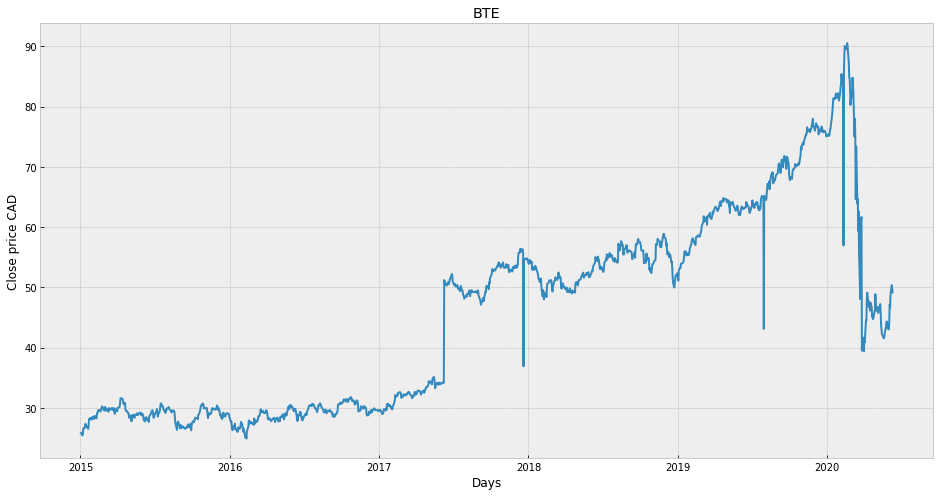

In [93]:
#Visualize the data
plt.figure(figsize = (16, 8))
plt.title('BTE')
plt.xlabel('Days')
plt.ylabel('Close price CAD')
plt.plot(df['Close'])
plt.show()

In [94]:
#Get the close price
df = df[['Close']]
df.head(1369)

,Close
Date,
2015-01-02,25.822001
2015-01-05,25.573299
2015-01-06,25.429300
2015-01-07,25.865601
2015-01-08,26.620399
...,...
2020-06-04,46.590000
2020-06-05,48.720001
2020-06-08,50.360001


In [122]:
#Create a variable to predict 'x' days out of the future 
future_days = 365

df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(1369)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2015-01-02,25.822001,27.822500
2015-01-05,25.573299,28.071199
2015-01-06,25.429300,28.863199
2015-01-07,25.865601,28.800100
2015-01-08,26.620399,29.352100
...,...,...
2020-06-04,46.590000,NaN
2020-06-05,48.720001,NaN
2020-06-08,50.360001,NaN


In [123]:
#Create a feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[25.8220005 ]
 [25.57329941]
 [25.42930031]
 ...
 [50.77000046]
 [49.97999954]
 [51.93000031]]


In [124]:
#Create the target data set (Y) and convert it to a numpy array and get all of the target values except the last 'X' rows/days
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[27.82250023 28.07119942 28.86319923 ... 50.36000061 49.93999863
 49.16999817]


In [0]:
#Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25) 

In [0]:
#Create the model
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, Y_train)
#Create the linear regression  model
lr = LinearRegression().fit(X_train, Y_train)

In [128]:
#Get the last 'X' rows of the feature data set
X_future = df.drop(['Prediction'], 1)[:-future_days]
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

array([[49.88999939],
       [49.52000046],
       [49.34999847],
       [49.99000168],
       [50.24000168],
       [49.72000122],
       [49.45999908],
       [48.79999924],
       [48.77000046],
       [48.40999985],
       [48.13000107],
       [48.49000168],
       [48.54999924],
       [48.70000076],
       [48.45999908],
       [48.91999817],
       [49.02000046],
       [49.47999954],
       [48.90000153],
       [48.52999878],
       [49.45000076],
       [49.54000092],
       [49.38999939],
       [49.25999832],
       [49.25999832],
       [49.18999863],
       [49.29999924],
       [49.25      ],
       [49.25      ],
       [49.33000183],
       [49.09000015],
       [49.24000168],
       [49.5       ],
       [49.38999939],
       [48.66999817],
       [47.88999939],
       [47.56999969],
       [47.11000061],
       [47.40000153],
       [47.99000168],
       [48.27000046],
       [47.77000046],
       [47.72000122],
       [48.31999969],
       [49.34999847],
       [49

In [129]:
#Show the model tree prediction 
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(X_future)
print(lr_prediction)


[69.93000031 57.09999847 60.66999817 51.11999893 52.86000061 53.22000122
 53.18000031 53.88000107 53.86000061 64.68000031 54.09000015 54.15999985
 54.15999985 55.36000061 55.97999954 55.95000076 55.43999863 55.29000092
 55.52000046 54.15999985 55.33000183 55.74000168 71.75       58.70499992
 58.70499992 57.33000183 57.88000107 57.91500092 57.91500092 60.74499893
 57.34999847 57.36000061 57.09999847 71.75       58.29000092 58.56000137
 58.66999817 58.40000153 58.43000031 61.55000114 58.95000076 59.11000061
 59.43999863 60.18000031 60.66999817 58.70499992 61.79999924 61.43000031
 60.91999817 66.66999817 53.22000122 64.80000305 60.36999893 61.68999863
 55.83000183 55.04000092 61.75       69.79000092 61.63000107 61.34000015
 61.75999832 61.88000107 62.56999969 63.22999763 62.9849987  63.79000092
 63.29999924 69.61999893 62.88999939 62.88999939 62.65999985 63.09000015
 62.9849987  63.22999954 44.43000031 64.09999847 63.50999832 64.31999969
 63.22999763 64.79000092 64.37000275 64.72000122 63

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


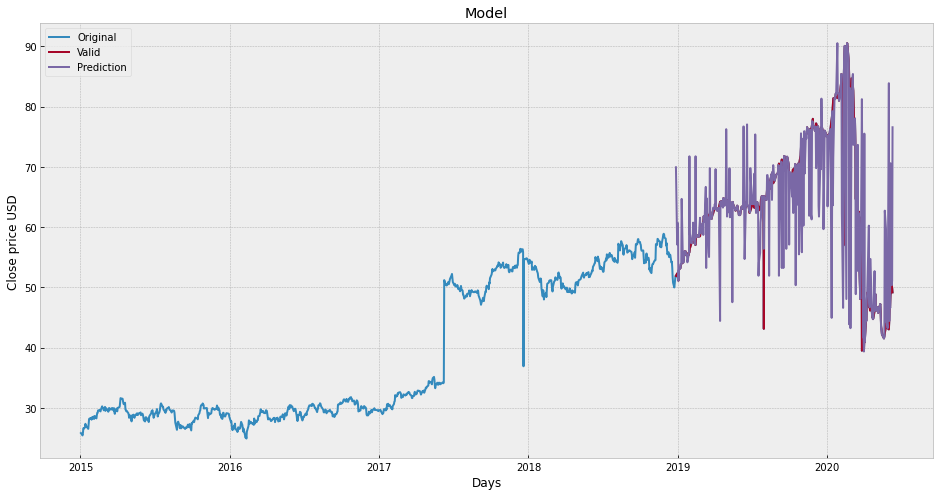

In [130]:
#Visualize the data
predictions = tree_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show() 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


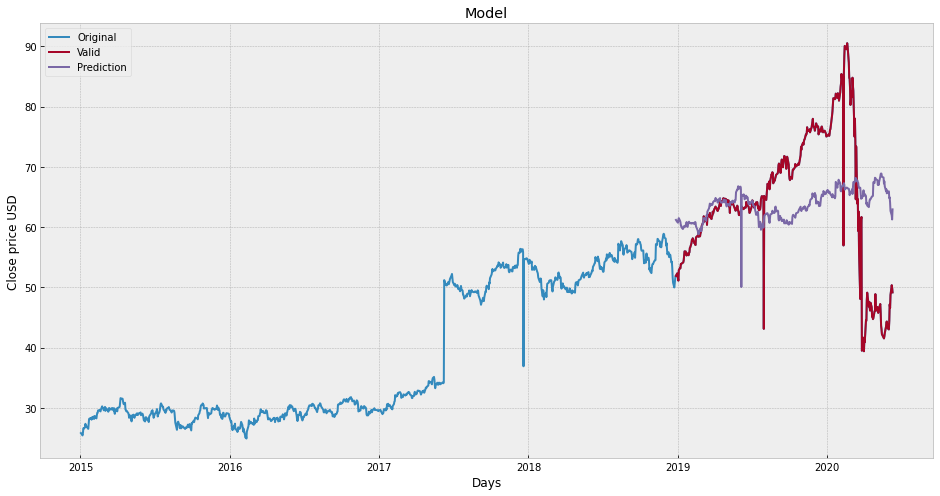

In [131]:
#Visualize the data
predictions = lr_prediction
valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show() 